In [1]:
#Data Import

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

COMPLETE_df = pd.read_csv("Stock Data (2012-2022)/COMPLETE_data.csv", index_col = 0, parse_dates = True).dropna()

SPY_df = pd.read_csv("Stock Data (2012-2022)/SPY_data.csv", index_col = 0, parse_dates = True).dropna()

In [2]:
#Create the training and testing datasets

TRAINING_df = COMPLETE_df.loc['2012-01-01':'2016-12-31']
PRECOVID_TESTING_df = COMPLETE_df.loc['2017-01-01':'2019-12-31']
COVID_TESTING_df = COMPLETE_df.loc['2020-01-01':'2022-01-01']


In [3]:
#Create a full list of all the ticker symbols and a set of tickers for each sector

all_tickers = list(COMPLETE_df.columns)

GOLD_tickers = set(['CDE', 'HL', 'NEM', 'RGLD'])

ENERGY_tickers = set(['COP', 'CVX', 'SHEL', 'XOM'])

HEALTHCARE_tickers = set(['CVS', 'ELV', 'HCA', 'UNH'])

TECH_tickers = set(['AAPL', 'AMZN', 'GOOG', 'MSFT'])

UTILITY_tickers = set(['D', 'DUK', 'NEE', 'SO'])


In [4]:
# Create all possible combinations of a portfolio of 5 stocks

from itertools import combinations

combs = list(combinations(all_tickers, 5))

#Store only combinations that has exactly one stock per sector in portfolio
portfolios = []

#It is crucial to use set operations to reduce runtime!!
for comb in combs:
    
    comb_set = set(comb)
    
    sum_gld = len(set.intersection(set(GOLD_tickers), comb_set))
    sum_energy = len(set.intersection(set(ENERGY_tickers), comb_set))
    sum_utility = len(set.intersection(set(UTILITY_tickers), comb_set))
    sum_healthcare = len(set.intersection(set(HEALTHCARE_tickers), comb_set))
    sum_tech = len(set.intersection(set(TECH_tickers), comb_set))
    
    if(sum_gld == sum_energy == sum_utility == sum_healthcare == sum_tech == 1):
        portfolios.append(list(comb))


# It is very time consuming to check if every valid portfolio combinations is in our list of 
# portfolios. A great work around for this is to check a couple of values at random indexes in the 
# list and confirm it meets our criteria. Then, check the length of the list of portfolios and make
# sure it matches up with the amount of portfolios expected (in our case 4^5 = 1024)
len(portfolios)
    
    

1024

In [5]:
portfolios[:10]

[['COP', 'CDE', 'CVS', 'AAPL', 'D'],
 ['COP', 'CDE', 'CVS', 'AAPL', 'DUK'],
 ['COP', 'CDE', 'CVS', 'AAPL', 'NEE'],
 ['COP', 'CDE', 'CVS', 'AAPL', 'SO'],
 ['COP', 'CDE', 'CVS', 'AMZN', 'D'],
 ['COP', 'CDE', 'CVS', 'AMZN', 'DUK'],
 ['COP', 'CDE', 'CVS', 'AMZN', 'NEE'],
 ['COP', 'CDE', 'CVS', 'AMZN', 'SO'],
 ['COP', 'CDE', 'CVS', 'GOOG', 'D'],
 ['COP', 'CDE', 'CVS', 'GOOG', 'DUK']]

In [6]:
TRAINING_df.head(10)

,COP,CVX,SHEL,XOM,CDE,HL,NEM,RGLD,CVS,ELV,HCA,UNH,AAPL,AMZN,GOOG,MSFT,D,DUK,NEE,SO
Date,,,,,,,,,,,,,,,,,,,,
2012-01-03,39.503304,71.152664,41.390953,55.358418,25.330000,5.446543,50.008633,60.809380,32.779312,57.656933,16.601580,43.781525,12.540046,8.9515,16.573130,21.527195,34.734024,40.991581,10.976557,27.804970
2012-01-04,39.316895,71.030167,41.418819,55.371304,25.590000,5.474912,49.855579,60.003040,33.000370,57.972462,15.957155,44.419247,12.607436,8.8755,16.644611,22.033812,34.449535,40.801960,10.948627,27.786449
2012-01-05,39.002655,70.333916,40.688267,55.203938,25.840000,5.437089,50.024742,60.169575,32.960880,58.424438,16.333073,44.716866,12.747403,8.8805,16.413727,22.258972,34.376755,40.783012,11.088282,27.749407
2012-01-06,38.699070,69.824661,41.134403,54.791969,25.639999,5.342529,49.920025,60.975925,32.731953,60.317593,17.138603,44.878410,12.880663,9.1305,16.189817,22.604755,34.026112,40.783012,10.970974,27.465359
2012-01-09,38.848198,70.585335,41.257107,55.036602,25.510000,5.361442,49.525307,61.650799,32.992477,60.701366,16.609251,44.827393,12.860233,8.9280,15.503389,22.307230,33.979797,40.707176,10.984007,27.755581
2012-01-10,39.029282,70.308151,41.457867,55.178188,26.510000,5.522188,50.467804,62.159149,33.118786,61.579723,17.230659,44.742363,12.906281,8.9670,15.520326,22.387642,33.933487,40.707176,11.032419,27.656775
2012-01-11,38.352886,69.476509,39.991161,54.766220,25.930000,4.359127,51.023636,60.152039,33.189842,61.886730,18.258671,45.073978,12.885239,8.9450,15.590563,22.291142,33.854092,40.574451,11.024973,27.823494
2012-01-12,37.687122,67.671425,39.004074,54.547356,26.370001,4.538787,51.587505,59.827728,33.276695,61.238621,17.890429,44.954929,12.849866,8.7965,15.682219,22.516306,33.695301,40.346928,11.058486,27.854376
2012-01-13,37.463432,68.393471,38.596989,54.637478,25.760000,4.463141,51.063889,59.529743,33.276695,61.323921,18.335388,44.810398,12.801685,8.9210,15.566403,22.717348,33.476974,40.403816,11.008215,27.953171


### Let's try to create the optimal portfolio using the training data

In [7]:
rets = TRAINING_df.pct_change().dropna()
rets.head(10)

,COP,CVX,SHEL,XOM,CDE,HL,NEM,RGLD,CVS,ELV,HCA,UNH,AAPL,AMZN,GOOG,MSFT,D,DUK,NEE,SO
Date,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.004719,-0.001722,0.000673,0.000233,0.010265,0.005209,-0.003061,-0.013260,0.006744,0.005473,-0.038817,0.014566,0.005374,-0.008490,0.004313,0.023534,-0.008190,-0.004626,-0.002544,-0.000666
2012-01-05,-0.007992,-0.009802,-0.017638,-0.003023,0.009769,-0.006908,0.003393,0.002775,-0.001197,0.007796,0.023558,0.006700,0.011102,0.000563,-0.013871,0.010219,-0.002113,-0.000464,0.012755,-0.001333
2012-01-06,-0.007784,-0.007241,0.010965,-0.007463,-0.007740,-0.017392,-0.002093,0.013401,-0.006945,0.032403,0.049319,0.003613,0.010454,0.028152,-0.013642,0.015535,-0.010200,0.000000,-0.010579,-0.010236
2012-01-09,0.003854,0.010894,0.002983,0.004465,-0.005070,0.003540,-0.007907,0.011068,0.007959,0.006363,-0.030887,-0.001137,-0.001586,-0.022178,-0.042399,-0.013162,-0.001361,-0.001860,0.001188,0.010567
2012-01-10,0.004661,-0.003927,0.004866,0.002573,0.039200,0.029982,0.019031,0.008246,0.003828,0.014470,0.037413,-0.001897,0.003581,0.004368,0.001092,0.003605,-0.001363,0.000000,0.004408,-0.003560
2012-01-11,-0.017330,-0.011829,-0.035378,-0.007466,-0.021879,-0.210616,0.011014,-0.032290,0.002146,0.004986,0.059662,0.007412,-0.001630,-0.002453,0.004525,-0.004310,-0.002340,-0.003260,-0.000675,0.006028
2012-01-12,-0.017359,-0.025981,-0.024683,-0.003996,0.016969,0.041215,0.011051,-0.005392,0.002617,-0.010473,-0.020168,-0.002641,-0.002745,-0.016601,0.005879,0.010101,-0.004690,-0.005608,0.003040,0.001110
2012-01-13,-0.005935,0.010670,-0.010437,0.001652,-0.023132,-0.016667,-0.010150,-0.004981,0.000000,0.001393,0.024871,-0.003215,-0.003750,0.014153,-0.007385,0.008929,-0.006479,0.001410,-0.004546,0.003547
2012-01-17,0.006540,0.005938,0.006213,0.009543,-0.001941,0.012712,-0.038650,0.005006,0.009252,0.011542,0.005021,0.016508,0.011648,0.018159,0.005744,0.000354,0.003953,0.000469,0.000508,-0.001767


In [8]:
rets.corr() 

,COP,CVX,SHEL,XOM,CDE,HL,NEM,RGLD,CVS,ELV,HCA,UNH,AAPL,AMZN,GOOG,MSFT,D,DUK,NEE,SO
COP,1.000000,0.746447,0.649418,0.659882,0.257611,0.258844,0.206732,0.181809,0.249472,0.250599,0.221031,0.246887,0.222111,0.217184,0.229985,0.305670,0.206763,0.146809,0.172388,0.115809
CVX,0.746447,1.000000,0.708590,0.799605,0.272247,0.280754,0.270671,0.198367,0.316133,0.282596,0.248354,0.311814,0.270697,0.276518,0.277249,0.379194,0.323054,0.249153,0.279951,0.216673
SHEL,0.649418,0.708590,1.000000,0.664403,0.281361,0.290978,0.259745,0.254180,0.292204,0.230673,0.226279,0.251531,0.232800,0.239061,0.246078,0.339819,0.280743,0.197797,0.220610,0.170317
XOM,0.659882,0.799605,0.664403,1.000000,0.243499,0.254579,0.243046,0.194982,0.341568,0.315610,0.233239,0.319621,0.253850,0.273477,0.296300,0.368528,0.354410,0.285481,0.316837,0.256439
CDE,0.257611,0.272247,0.281361,0.243499,1.000000,0.793637,0.710384,0.700122,0.100592,0.035189,0.122564,0.061268,0.130833,0.077185,0.079344,0.133060,0.147192,0.163814,0.169011,0.134218
HL,0.258844,0.280754,0.290978,0.254579,0.793637,1.000000,0.733497,0.743829,0.072908,0.043297,0.095780,0.087699,0.128528,0.092338,0.104676,0.130525,0.156730,0.170145,0.179119,0.145209
NEM,0.206732,0.270671,0.259745,0.243046,0.710384,0.733497,1.000000,0.763632,0.074650,0.026899,0.048317,0.049600,0.093463,0.069135,0.033957,0.102980,0.166485,0.203352,0.172118,0.175653
RGLD,0.181809,0.198367,0.254180,0.194982,0.700122,0.743829,0.763632,1.000000,0.067471,0.027014,0.083322,0.069734,0.098145,0.037152,0.044446,0.092516,0.191579,0.218755,0.188895,0.198835
CVS,0.249472,0.316133,0.292204,0.341568,0.100592,0.072908,0.074650,0.067471,1.000000,0.326558,0.265183,0.385239,0.229358,0.241914,0.290688,0.314078,0.308841,0.266148,0.322733,0.253231
ELV,0.250599,0.282596,0.230673,0.315610,0.035189,0.043297,0.026899,0.027014,0.326558,1.000000,0.256127,0.674135,0.189204,0.197879,0.234414,0.291787,0.209133,0.147534,0.207256,0.147229


In [9]:
lowest_corr = []
for i in range(len(rets.corr())):
      lowest_corr.append(round(min(rets.corr().iloc[i]),4))



In [10]:
lowest_rets = rets.corr().idxmin(axis="columns").to_frame().reset_index()

lowest_rets.columns = ["Stock 1", "Stock 2"]

lowest_rets["Correlation"] = lowest_corr


In [11]:
lowest_rets.sort_values("Correlation")

,Stock 1,Stock 2,Correlation
9,ELV,NEM,0.0269
6,NEM,ELV,0.0269
7,RGLD,ELV,0.0270
14,GOOG,NEM,0.0340
4,CDE,ELV,0.0352
13,AMZN,RGLD,0.0372
5,HL,ELV,0.0433
10,HCA,NEM,0.0483
11,UNH,NEM,0.0496
8,CVS,RGLD,0.0675


In [12]:
# Expected annual return and volatility for any portfolio weights

def port_ret(weights, portfolio_df):
    port_rets = np.log(portfolio_df/portfolio_df.shift(1))
    return np.sum(port_rets.mean() * weights) * 252

def port_vol(weights, portfolio_df):
    port_rets = np.log(portfolio_df/portfolio_df.shift(1))
    return np.sqrt(np.dot(weights.T, np.dot(port_rets.cov() * 252, weights)))

In [13]:
# Optimal portfolio
import scipy.optimize as sco

noa = 5

def min_func_sharpe(weights, portfolio_df):
 return -port_ret(weights, portfolio_df) / port_vol(weights, portfolio_df)

# Equality constraint
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for the parameters
bnds = tuple((0, 1) for x in range(noa))

# Starting parameter list
# Equal weights vector
eweights = np.array(noa * [1. / noa,])

In [14]:
# Optimal portfolio by maximizing the Sharpe Ratio
# Solve for the optimal weights with the maximum sharpe ratio

train_port_sharpe_ratios = {}

for comb in portfolios:
    portfolio_df = TRAINING_df[comb]
    opts = sco.minimize(min_func_sharpe, eweights, args=(portfolio_df), method = 'SLSQP', 
                        bounds = bnds, constraints = cons)
    
    sharpe_ratio = -opts['fun']
    
    train_port_sharpe_ratios[tuple(comb)] = sharpe_ratio

In [15]:
#Let's find the top 5 portfolios based on the sharpe ratio based on the training data

train_top_5_SR = sorted(train_port_sharpe_ratios.values(), reverse= True)[:5]

train_top_5_portfolios = []

for i in range(0,5):
    train_top_5_portfolios.append(tuple(list(train_port_sharpe_ratios.keys())[list(train_port_sharpe_ratios.values()).index(train_top_5_SR[i])]))


In [16]:
for portfolio in train_top_5_portfolios:
    sharpe_ratio = train_port_sharpe_ratios[portfolio]
    print(str(portfolio) + " : " + str(sharpe_ratio))

('CVX', 'RGLD', 'UNH', 'AMZN', 'NEE') : 1.5337881380164358
('XOM', 'RGLD', 'UNH', 'AMZN', 'NEE') : 1.5337881341003818
('CVX', 'NEM', 'UNH', 'AMZN', 'NEE') : 1.5337881325288358
('XOM', 'NEM', 'UNH', 'AMZN', 'NEE') : 1.5337881320057958
('COP', 'RGLD', 'UNH', 'AMZN', 'NEE') : 1.533788129186189


In [17]:
train_port_weight_dict = {}


for portfolio in train_top_5_portfolios:

    portfolio_df = TRAINING_df[list(portfolio)]

    opts = sco.minimize(min_func_sharpe, eweights, args=(portfolio_df), method = 'SLSQP', 
                        bounds = bnds, constraints = cons)

    weights = opts['x']
    
    train_port_weight_dict[tuple(portfolio)] = weights

print(train_port_weight_dict)

{('CVX', 'RGLD', 'UNH', 'AMZN', 'NEE'): array([0.00000000e+00, 1.24812718e-16, 3.65775919e-01, 1.82600515e-01,
       4.51623566e-01]), ('XOM', 'RGLD', 'UNH', 'AMZN', 'NEE'): array([0.00000000e+00, 1.51238493e-16, 3.65782399e-01, 1.82603882e-01,
       4.51613719e-01]), ('CVX', 'NEM', 'UNH', 'AMZN', 'NEE'): array([3.15844287e-16, 0.00000000e+00, 3.65783202e-01, 1.82606949e-01,
       4.51609849e-01]), ('XOM', 'NEM', 'UNH', 'AMZN', 'NEE'): array([9.45011536e-17, 1.15057492e-16, 3.65783709e-01, 1.82607677e-01,
       4.51608614e-01]), ('COP', 'RGLD', 'UNH', 'AMZN', 'NEE'): array([2.42628924e-16, 0.00000000e+00, 3.65794626e-01, 1.82602419e-01,
       4.51602955e-01])}


([<matplotlib.patches.Wedge at 0x7efcd016ca20>,
 [Text(1.1, 0.0, 'CVX'),
  Text(1.1, 4.313217742831226e-16, 'RGLD'),
  Text(0.4502206491601833, 1.0036440440065308, 'UNH'),
  Text(-1.060236434230373, 0.293084806038226, 'AMZN'),
  Text(0.16653405429284399, -1.0873207478756157, 'NEE')])

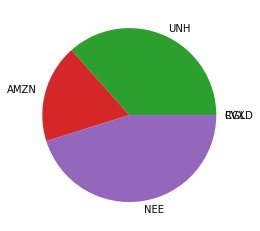

In [18]:
#Let's take a look at the distribution of the portfolio with the highest sharpe ratio in the training dataset
plt.pie(train_port_weight_dict[train_top_5_portfolios[0]], labels = train_top_5_portfolios[0])

Text(0, 0.5, 'values')

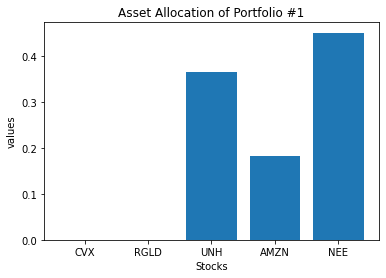

In [19]:
plt.bar(list(train_top_5_portfolios[0]), train_port_weight_dict[train_top_5_portfolios[0]])
plt.title('Asset Allocation of Portfolio #1')
plt.xlabel("Stocks")
plt.ylabel('values')

([<matplotlib.patches.Wedge at 0x7efccfc80d30>,
 [Text(1.1, 0.0, 'XOM'),
  Text(1.1, 5.226426920872151e-16, 'RGLD'),
  Text(0.450200164056118, 1.0036532330859322, 'UNH'),
  Text(-1.0602514977081412, 0.2930303083430853, 'AMZN'),
  Text(0.1665678525811384, -1.087315570791897, 'NEE')])

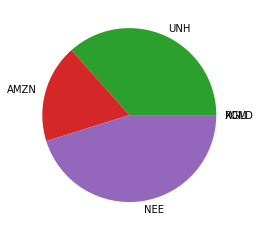

In [20]:
plt.pie(train_port_weight_dict[train_top_5_portfolios[1]], labels = train_top_5_portfolios[1])

Text(0, 0.5, 'values')

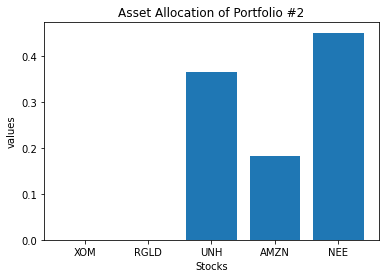

In [21]:
plt.bar(list(train_top_5_portfolios[1]), train_port_weight_dict[train_top_5_portfolios[1]])
plt.title('Asset Allocation of Portfolio #2')
plt.xlabel("Stocks")
plt.ylabel('values')

([<matplotlib.patches.Wedge at 0x7efccfbaeeb8>,
 [Text(1.1, 1.0914795193780262e-15, 'CVX'),
  Text(1.1, 2.1829590387560524e-15, 'NEM'),
  Text(0.4501976268971476, 1.0036543711538235, 'UNH'),
  Text(-1.0602558049635622, 0.2930147232496498, 'AMZN'),
  Text(0.1665810868068073, -1.0873135433343333, 'NEE')])

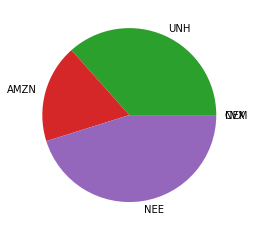

In [22]:
plt.pie(train_port_weight_dict[train_top_5_portfolios[2]], labels = train_top_5_portfolios[2])

Text(0, 0.5, 'values')

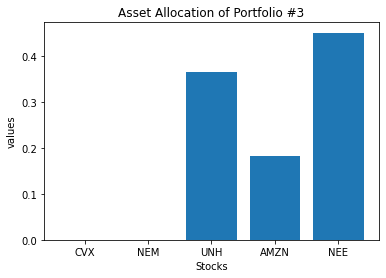

In [23]:
plt.bar(list(train_top_5_portfolios[2]), train_port_weight_dict[train_top_5_portfolios[2]])
plt.title('Asset Allocation of Portfolio #3')
plt.xlabel("Stocks")
plt.ylabel('values')

([<matplotlib.patches.Wedge at 0x7efcd018a860>,
 [Text(1.1, 3.2657255269966783e-16, 'XOM'),
  Text(1.1, 1.0507552403927833e-15, 'NEM'),
  Text(0.45019602942521003, 1.0036550877117973, 'UNH'),
  Text(-1.0602574098377298, 0.2930089160489634, 'AMZN'),
  Text(0.16658536247443897, -1.087312888275155, 'NEE')])

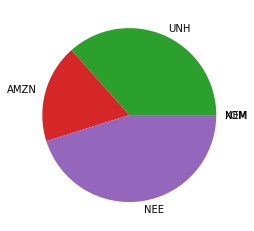

In [24]:
plt.pie(train_port_weight_dict[train_top_5_portfolios[3]], labels = train_top_5_portfolios[3])

Text(0, 0.5, 'values')

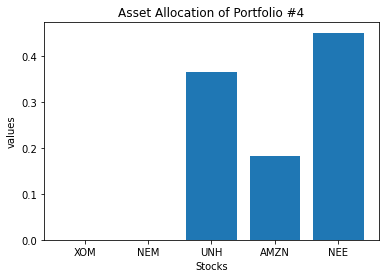

In [25]:
plt.bar(list(train_top_5_portfolios[3]), train_port_weight_dict[train_top_5_portfolios[3]])
plt.title('Asset Allocation of Portfolio #4')
plt.xlabel("Stocks")
plt.ylabel('values')

([<matplotlib.patches.Wedge at 0x7efccfa6bf98>,
 [Text(1.1, 8.384654074125996e-16, 'COP'),
  Text(1.1, 1.6769308148251991e-15, 'RGLD'),
  Text(0.4501616365174784, 1.0036705141668285, 'UNH'),
  Text(-1.0602726476988642, 0.2929537720215265, 'AMZN'),
  Text(0.16660460294691046, -1.0873099403007878, 'NEE')])

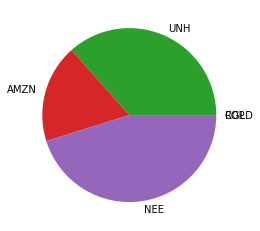

In [26]:
plt.pie(train_port_weight_dict[train_top_5_portfolios[4]], labels = train_top_5_portfolios[4])

Text(0, 0.5, 'values')

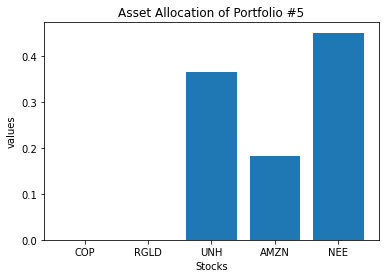

In [27]:
plt.bar(list(train_top_5_portfolios[4]), train_port_weight_dict[train_top_5_portfolios[4]])
plt.title('Asset Allocation of Portfolio #5')
plt.xlabel("Stocks")
plt.ylabel('values')

In [28]:
#Since all the portfolio's are very similar let's focus on the one with the highest sharpe ratio and see how it's distributed

top_port = train_top_5_portfolios[0]

In [29]:
weights = train_port_weight_dict[top_port]
portfolio_df = TRAINING_df[list(top_port)]
TRAINING_port_ret = port_ret(weights, portfolio_df)
TRAINING_port_vol = port_vol(weights, portfolio_df)
print("Portfolio Returns: " + str(TRAINING_port_ret))
print("Portfolio Volatility: " + str(TRAINING_port_vol))

Portfolio Returns: 0.21995643529715317
Portfolio Volatility: 0.1434073128128444


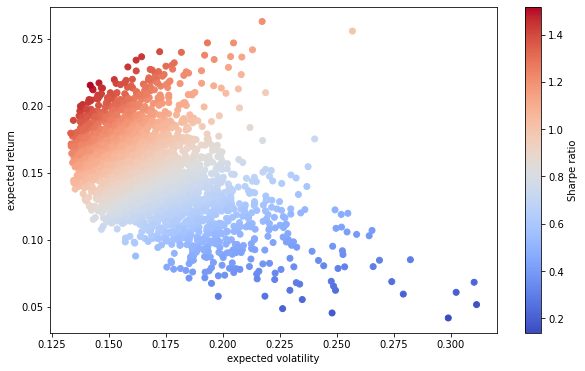

In [30]:
#Lets take a closer look at the portfolio with the highest possible sharpe ratio using Monte Carlo Simulation

def monte_carlo_sim(portfolio):
    
    prets = []
    pvols = []
    
    portfolio_df = TRAINING_df[list(portfolio)]

    # Monte Carlo simulation of portfolio weights
    for p in range (2500):
        weights = np.random.random(noa)
        weights /= np.sum(weights)
        # Collect the resulting returns and volatility in list objects
        prets.append(port_ret(weights, portfolio_df))
        pvols.append(port_vol(weights, portfolio_df))

    prets = np.array(prets)
    pvols = np.array(pvols)

    plt.figure(figsize = (10,6))
    plt.scatter(pvols, prets, c = prets/pvols, marker = 'o', cmap = 'coolwarm')
    plt.xlabel('expected volatility')
    plt.ylabel('expected return')
    plt.colorbar(label = 'Sharpe ratio');


monte_carlo_sim(top_port)

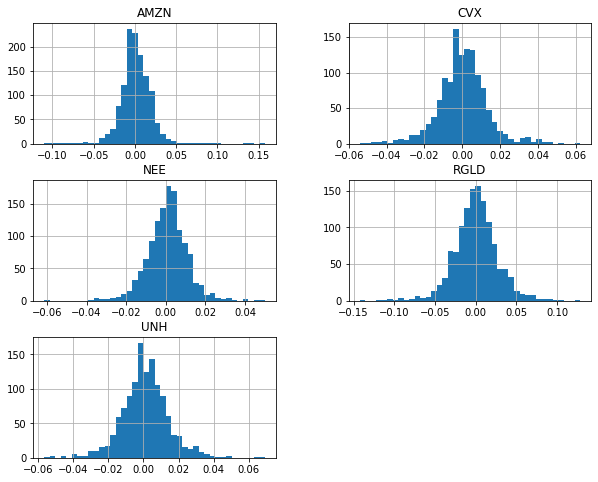

In [31]:
#Examine the distribution of returns for each stock in the optimal portfolio
port_rets = rets[list(top_port)]
port_rets.hist(bins = 40, figsize = (10, 8));

### Now let's see how the portfolio's with highest sharpe ratios performed in the PRE-COVID testing dataset

In [32]:
#Let's take a quick look at the returns in the PRE-COVID testing dataset

PRECOVID_rets = PRECOVID_TESTING_df.pct_change().dropna()
PRECOVID_rets.head(10)

,COP,CVX,SHEL,XOM,CDE,HL,NEM,RGLD,CVS,ELV,HCA,UNH,AAPL,AMZN,GOOG,MSFT,D,DUK,NEE,SO
Date,,,,,,,,,,,,,,,,,,,,
2017-01-04,0.009287,-0.000254,0.010141,-0.011002,0.018481,0.012727,0.009529,0.008852,-0.007468,-0.001326,0.035858,0.002849,-0.001119,0.004657,0.000967,-0.004474,-0.000918,-0.001029,0.002948,-0.001019
2017-01-05,-0.002937,-0.004329,0.008785,-0.014907,0.133064,0.046679,0.046053,0.033713,0.020941,0.010626,-0.004149,0.001668,0.005086,0.030732,0.009048,0.000000,0.001313,0.001288,-0.000588,0.003062
2017-01-06,-0.003731,-0.004006,-0.008530,-0.000565,-0.063167,-0.027444,-0.031447,-0.024423,0.009580,-0.001522,-0.002473,0.001418,0.011148,0.019912,0.015277,0.008668,0.008128,-0.003344,-0.002941,-0.002645
2017-01-09,-0.021285,-0.008559,-0.021330,-0.016497,0.004748,-0.001764,-0.001694,0.005190,-0.006083,-0.010807,0.030018,-0.002833,0.009159,0.001168,0.000620,-0.003183,-0.015345,-0.010969,-0.002529,-0.009794
2017-01-10,0.000000,-0.007597,-0.004213,-0.012753,0.036862,0.028269,-0.007919,0.017312,0.011873,0.024862,-0.008236,-0.002284,0.001009,-0.001280,-0.002306,-0.000319,-0.003830,-0.001827,0.001943,-0.003091
2017-01-11,0.031413,0.008438,0.020232,0.010241,-0.000912,-0.005155,-0.020240,-0.004777,0.001210,-0.003485,0.013287,0.001919,0.005373,0.003920,0.003877,0.009103,0.002651,0.007843,0.007000,0.007441
2017-01-12,-0.020890,0.001984,0.004327,-0.005414,-0.006387,0.003454,0.002910,-0.001500,-0.002054,0.016183,-0.002396,0.002903,-0.004175,0.018297,-0.001919,-0.009179,-0.004628,0.005707,0.000754,0.005334
2017-01-13,0.008774,0.001894,-0.004129,0.000116,0.045914,0.027539,0.001740,0.009163,-0.007506,0.002294,0.003539,-0.003449,-0.001761,0.004302,0.001885,0.001438,-0.000930,-0.004256,-0.003765,-0.004082
2017-01-17,-0.008697,-0.000859,0.001082,0.011697,0.018437,0.020101,0.017666,0.017862,0.023664,-0.011984,0.019270,-0.007046,0.008065,-0.009080,-0.004048,-0.002711,0.013163,0.003238,0.009828,0.018238


In [33]:
#Now let's take a look at how the top portfolios found using the training dataset performed in the PRE-COVID testing dataset

for portfolio in train_top_5_portfolios:
    
    weights = train_port_weight_dict[portfolio]
    portfolio_df = PRECOVID_TESTING_df[list(portfolio)]
    sharpe_ratio = -min_func_sharpe(weights, portfolio_df)
    
    print(str(portfolio) + " : " + str(sharpe_ratio))

('CVX', 'RGLD', 'UNH', 'AMZN', 'NEE') : 1.9213678647677745
('XOM', 'RGLD', 'UNH', 'AMZN', 'NEE') : 1.9213542282791605
('CVX', 'NEM', 'UNH', 'AMZN', 'NEE') : 1.9213498929782922
('XOM', 'NEM', 'UNH', 'AMZN', 'NEE') : 1.9213483607528457
('COP', 'RGLD', 'UNH', 'AMZN', 'NEE') : 1.9213363061797535


In [34]:
#Now let's take a look closer at how the top portfolio in the training dataset performed

weights = train_port_weight_dict[top_port]
portfolio_df = PRECOVID_TESTING_df[list(top_port)]
PRECOVID_port_ret = port_ret(weights, portfolio_df)
PRECOVID_port_vol = port_vol(weights, portfolio_df)
print("Portfolio Returns: " + str(PRECOVID_port_ret))
print("Portfolio Volatility: " + str(PRECOVID_port_vol))

Portfolio Returns: 0.2532479060348971
Portfolio Volatility: 0.13180604853381672


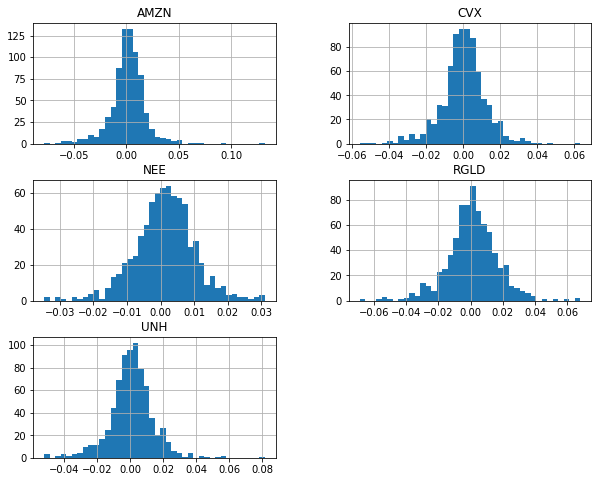

In [35]:
port_rets = PRECOVID_rets[list(top_port)]
port_rets.hist(bins = 40, figsize = (10, 8));

### Now let's look at the portfolio's with highest sharpe ratios in the COVID testing dataset 

In [36]:
#Let's take a quick look at the returns in the COVID testing dataset

COVID_rets = COVID_TESTING_df.pct_change().dropna()
COVID_rets.head(10)

,COP,CVX,SHEL,XOM,CDE,HL,NEM,RGLD,CVS,ELV,HCA,UNH,AAPL,AMZN,GOOG,MSFT,D,DUK,NEE,SO
Date,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.003666,-0.003459,0.007867,-0.008040,-0.014085,-0.020468,-0.009024,-0.008174,-0.007956,-0.013261,0.003051,-0.010120,-0.009722,-0.012139,-0.004907,-0.012452,-0.002440,0.000664,0.007124,-0.000958
2020-01-06,0.011872,-0.003388,0.012456,0.007678,-0.100000,-0.011940,0.010040,-0.010988,0.003942,0.012025,0.003785,0.006942,0.007969,0.014886,0.024657,0.002585,0.007706,0.004867,0.004993,0.003996
2020-01-07,0.000000,-0.012770,-0.009186,-0.008184,-0.005772,0.030211,-0.000694,0.011531,-0.003791,-0.003029,-0.001347,-0.006037,-0.004703,0.002092,-0.000624,-0.009118,-0.002185,-0.006275,-0.000870,-0.003025
2020-01-08,-0.023165,-0.011423,-0.011755,-0.015080,-0.087083,-0.043988,-0.026602,-0.071393,-0.012503,0.026507,0.006608,0.021084,0.016086,-0.007809,0.007880,0.015929,-0.006325,0.001440,-0.000456,-0.000320
2020-01-09,0.017400,-0.001614,-0.000168,0.007656,0.017488,-0.058282,-0.009981,0.005287,0.002752,-0.003480,-0.012460,-0.005678,0.021241,0.004799,0.011044,0.012493,0.002816,0.002434,0.007836,0.010543
2020-01-10,-0.009838,-0.009106,-0.011227,-0.008888,0.023438,0.003257,0.014642,0.014262,-0.010294,0.004341,0.004884,0.003093,0.002261,-0.009411,0.006973,-0.004627,0.001831,-0.001986,0.001892,0.006323
2020-01-13,-0.004433,0.001889,-0.000847,0.009546,-0.018321,-0.009740,0.004258,-0.022937,0.009014,-0.035745,-0.006615,-0.031444,0.021364,0.004323,0.006645,0.012025,-0.000244,0.008845,0.011702,0.013823
2020-01-14,0.000154,-0.003086,-0.000678,-0.008596,0.024883,0.029508,0.008952,0.010703,0.014706,0.000472,0.005096,0.008361,-0.013503,-0.011558,-0.005802,-0.007043,-0.001219,0.000658,0.005398,0.005888
2020-01-15,-0.002149,-0.001462,-0.001697,-0.001590,0.056146,0.031847,0.016110,0.019845,0.019504,0.015730,-0.004462,0.028345,-0.004285,-0.003969,0.005815,0.006476,0.012691,0.013034,0.015541,0.010166


In [37]:
#Now let's take a look at how the top portfolios found using the training dataset performed in the COVID testing dataset

for portfolio in train_top_5_portfolios:
    
    weights = train_port_weight_dict[portfolio]
    portfolio_df = COVID_TESTING_df[list(portfolio)]
    sharpe_ratio = -min_func_sharpe(weights, portfolio_df)
    
    print(str(portfolio) + " : " + str(sharpe_ratio))

('CVX', 'RGLD', 'UNH', 'AMZN', 'NEE') : 0.9443305643406732
('XOM', 'RGLD', 'UNH', 'AMZN', 'NEE') : 0.944332667943389
('CVX', 'NEM', 'UNH', 'AMZN', 'NEE') : 0.9443342184146928
('XOM', 'NEM', 'UNH', 'AMZN', 'NEE') : 0.9443346091872103
('COP', 'RGLD', 'UNH', 'AMZN', 'NEE') : 0.9443328310190686


In [38]:
#Now let's take a look closer at how the top portfolio in the training dataset performed

weights = train_port_weight_dict[top_port]
portfolio_df = COVID_TESTING_df[list(top_port)]
COVID_port_ret = port_ret(weights, portfolio_df)
COVID_port_vol = port_vol(weights, portfolio_df)
print("Portfolio Returns: " + str(COVID_port_ret))
print("Portfolio Volatility: " + str(COVID_port_vol))

Portfolio Returns: 0.26596690882167395
Portfolio Volatility: 0.28164598167737026


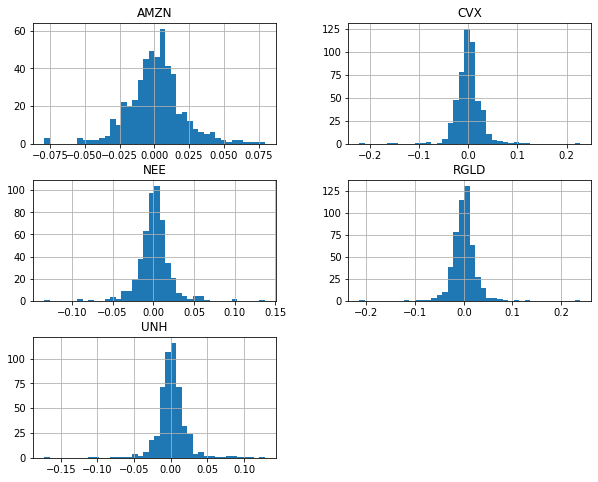

In [39]:
port_rets = COVID_rets[list(top_port)]
port_rets.hist(bins = 40, figsize = (10, 8));